In [2]:
# Principal component analysis
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# http://scikit-learn.org/stable/modules/decomposition.html

In [1]:
import numpy as np  

In [25]:
# Generate random data, 500 3-D vectors:
rndn3d = np.random.randn(500,3)
print(rndn3d)

[[ 0.73978036  0.76560197  0.53115175]
 [-0.45066773 -0.52178092  1.03589215]
 [-1.82102097  0.28229916  0.08418054]
 ...
 [ 0.94937702  0.38830309  0.41888115]
 [-0.49013939 -1.20929629  0.54783904]
 [ 0.45217065  1.20770308 -0.33290574]]


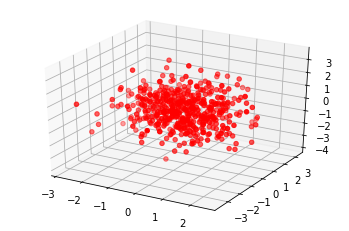

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rndn3d[:,0],rndn3d[:,1],rndn3d[:,2], c='r')
plt.show()

In [14]:
# Apply PCA to data
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(rndn3d)
# eigen values
pca.explained_variance_

array([1.15353632, 1.10465215, 0.95115392])

In [15]:
# eigen values in percentage de of explained variance
pca.explained_variance_ratio_
# We can see that explained variance ratio are similar because
# the data is random on all 3 direction so similarly distributed 
# on 3 axis --> 3D "almost" sphere

array([0.35943074, 0.34419891, 0.29637035])

In [16]:
# Every line is a eigen vector
pca.components_

array([[-0.07131238, -0.96694826,  0.24479706],
       [ 0.0880285 , -0.25056535, -0.9640892 ],
       [-0.99356204,  0.04720238, -0.10298741]])

In [17]:
# Doing the same with another random data matrix
rndn3d1 = np.random.randn(500,3)
pca1 = PCA(n_components=3)
pca1.fit(rndn3d1)
# eigen values
pca1.explained_variance_

array([1.08264286, 0.98453533, 0.78758759])

In [18]:
pca1.explained_variance_ratio_

array([0.37924052, 0.34487429, 0.27588519])

In [19]:
pca1.components_

array([[-0.20472429,  0.20699392,  0.95668254],
       [-0.90618294,  0.32940394, -0.26518961],
       [-0.37002763, -0.92122015,  0.12013737]])

In [20]:
# Now let's scale and rotate the initial data:
s1 = np.array([[3,0,0],[0,1,0],[0,0,0.2]])  # scaling matrix
r1 = np.array([[0.36,0.48,-0.8],[-0.8,0.6,0],[0.48,0.64,0.6]])  # rotation matrix
rndef = rndn3d.dot(s1).dot(r1)

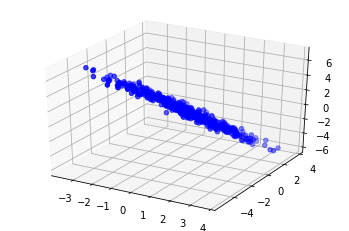

In [22]:
# Show the scaled and rotated data:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rndef[:,0],rndef[:,1],rndef[:,2], c='b')
plt.show()
# Now we can see that data is not equaly distributed on 3 axis 
# because of scaling

In [23]:
# Let's apply ACP to this new data (scaled and rotated data)
pca2 = PCA(n_components=3)
pca2.fit(rndef)
pca2.explained_variance_ratio_

array([0.87783576, 0.11764002, 0.00452422])

In [24]:
pca2.components_

array([[-0.35602308, -0.4818103 ,  0.8006912 ],
       [ 0.80244989, -0.59671522, -0.00226412],
       [-0.4788755 , -0.64170848, -0.59907302]])

In [26]:
# ACP mammal sleeping time

In [27]:
from io import StringIO
mammals = np.loadtxt('mammals.csv', delimiter=';', usecols=[1,2,3,4,5,6,7,8,9,10], skiprows=1)
mammals[:2,:]

array([[6.654e+03, 5.712e+03, 8.350e+00, 1.800e+00, 3.300e+00, 3.860e+01,
        6.450e+02, 3.000e+00, 5.000e+00, 3.000e+00],
       [1.000e+00, 6.600e+00, 6.300e+00, 2.000e+00, 8.300e+00, 4.500e+00,
        4.200e+01, 3.000e+00, 1.000e+00, 3.000e+00]])

In [28]:
noms = np.genfromtxt('mammals.csv', dtype='str', delimiter=';', usecols=[0], skip_header=1)
noms

array(['African elephant  ', 'African giant pouched rat', 'Arctic Fox  ',
       'Arctic ground squirrel ', 'Asian elephant  ', 'Baboon   ',
       'Big brown bat ', 'Brazilian tapir  ', 'Cat   ', 'Chimpanzee   ',
       'Chinchilla   ', 'Cow   ', 'Desert hedgehog  ', 'Donkey   ',
       'Eastern American mole ', 'Echidna   ', 'European hedgehog  ',
       'Galago   ', 'Genet   ', 'Giant armadillo  ', 'Giraffe   ',
       'Goat   ', 'Golden hamster  ', 'Gorilla   ', 'Gray seal  ',
       'Gray wolf  ', 'Ground squirrel  ', 'Guinea pig  ', 'Horse   ',
       'Jaguar   ', 'Kangaroo   ', 'Lesser short-tailed shrew ',
       'Little brown bat ', 'Man   ', 'Mole rat  ', 'Mountain beaver  ',
       'Mouse   ', 'Musk shrew  ', 'N. American opossum ',
       'Nine-banded armadillo  ', 'Okapi   ', 'Owl monkey  ',
       'Patas monkey  ', 'Phanlanger   ', 'Pig   ', 'Rabbit   ',
       'Raccoon   ', 'Rat   ', 'Red fox  ', 'Rhesus monkey  ',
       'Rock hyrax (Hetero. b)', 'Rock hyrax (Procavia h

In [44]:
# PCA on brut data
pca3 = PCA(n_components=10)
pca3.fit(mammals)
pca3.explained_variance_ratio_

array([9.61492649e-01, 3.35026815e-02, 4.90760735e-03, 8.11547630e-05,
       1.21589728e-05, 2.12907093e-06, 8.08341160e-07, 4.40101019e-07,
       3.18913491e-07, 5.23943276e-08])

In [45]:
# Centring and normalized data:
from sklearn import preprocessing
mammalsCR = preprocessing.scale(mammals)

In [46]:
# PCA on normalized data
pcaCR = PCA(n_components=10)
pcaCR.fit(mammalsCR)
pcaCR.explained_variance_ratio_

array([0.48017524, 0.22078825, 0.12605711, 0.06488067, 0.04739057,
       0.02607844, 0.01797744, 0.00920976, 0.00501433, 0.00242818])

In [47]:
# Project the data on 2 first principal axes
mNt = pcaCR.transform(mammalsCR)
mNt[:2,:]

array([[ 6.50530263,  6.7330641 ,  3.43983054, -2.05458566, -1.38117895,
         0.06000125,  0.66178241,  0.31378774, -0.37607103, -0.30709013],
       [-0.42443283, -0.80647942, -0.41704187, -1.29587063,  0.09294702,
         0.39025445, -0.16477426,  0.09485348,  0.31128589, -0.1266842 ]])

<IPython.core.display.Javascript object>


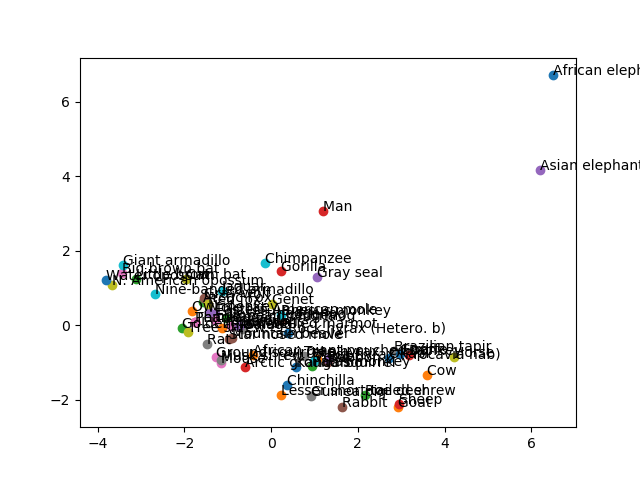

In [67]:
# Show the projection on principal axes:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(noms)):
        x,y = mNt[i,0],mNt[i,1]
        ax.scatter(x,y)
        ax.text(x,y,noms[i])
plt.show()

<IPython.core.display.Javascript object>


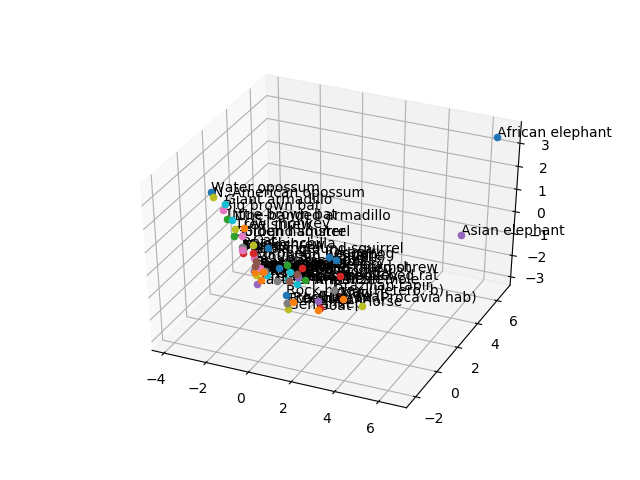

In [68]:
# Show projection in 3 first axes:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(noms)):
        x,y,z = mNt[i,0],mNt[i,1],mNt[i,2]
        ax.scatter(x,y,z)
        ax.text(x,y,z,noms[i])
plt.show()